# EDA

## <a id="1">importing Libraries</a>

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, norm, zscore

We will be using following libraries:

- pandas to work with tabular data
- scikit learn to get toy datasets and classification models
- numpy for scientific calculations

## <a id="2">Loading Dataset</a>

We are going to explore the iris dataset and analyse it using stastical tools

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['type'] = iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

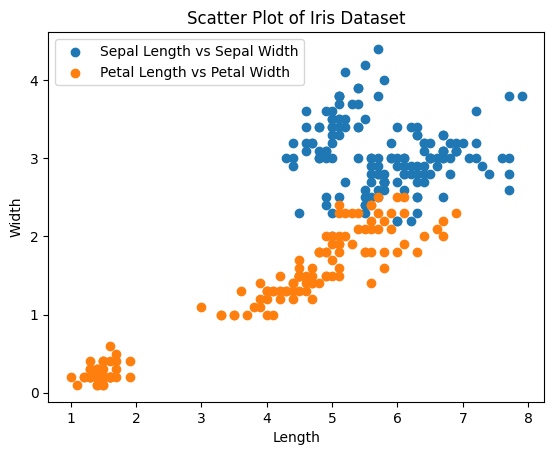

In [9]:
sepal_length = df.iloc[:, 0]
sepal_width = df.iloc[:, 1]
petal_length = df.iloc[:, 2]
petal_width = df.iloc[:, 3]

plt.scatter(sepal_length, sepal_width, label='Sepal Length vs Sepal Width')
plt.scatter(petal_length, petal_width, label='Petal Length vs Petal Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.title('Scatter Plot of Iris Dataset')
plt.show()


## <a id="3">Define Objectives</a>

We want to study the relationship between the type of iris and the dimensions of their sepals and petals.

## <a id="5">Data cleaning</a>

- find and remove duplicate values
- handle null values
- remove outliers

### Find outliers

<Axes: >

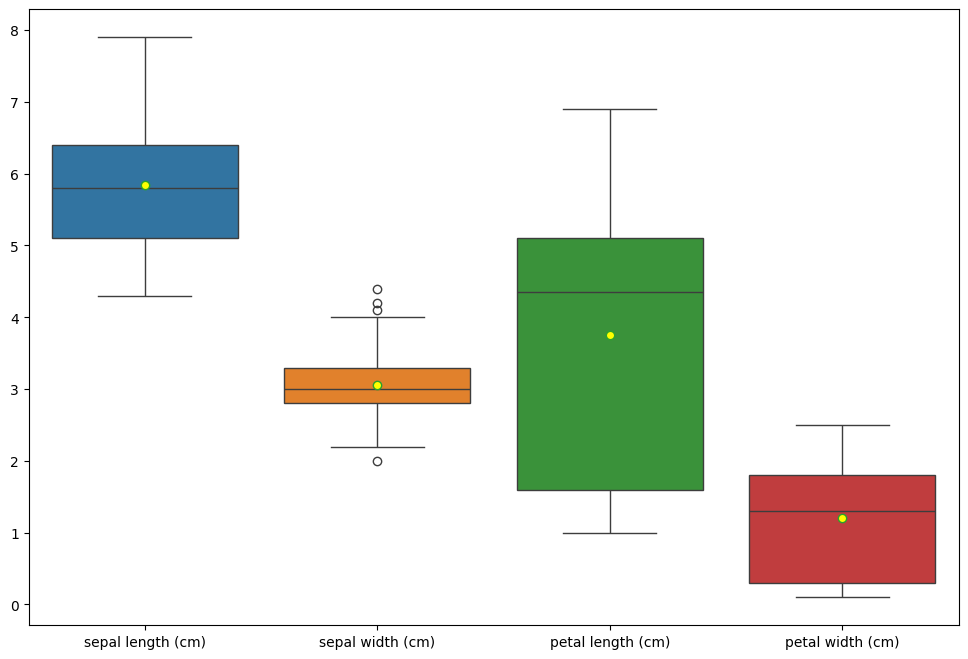

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(df.iloc[:,:-2], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow"})

we have identified outliers in the `sepal width`

<Axes: ylabel='sepal width (cm)'>

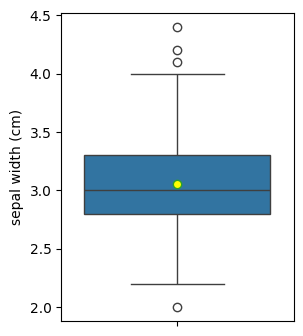

In [11]:
plt.figure(figsize=(3, 4))
sns.boxplot(df['sepal width (cm)'], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow"})

In [12]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
type                 0
species              0
dtype: int64

In [13]:
z_scores = zscore(df.iloc[:, :-2])

In [14]:
z_scores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [15]:
z_scores.max()

sepal length (cm)    2.492019
sepal width (cm)     3.090775
petal length (cm)    1.785832
petal width (cm)     1.712096
dtype: float64

In [16]:
z_scores[z_scores['sepal width (cm)'] > 3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,-0.173674,3.090775,-1.283389,-1.05218


In [17]:
outliers = z_scores[z_scores > 3]
outliers = outliers.dropna(axis=0, how='all')
outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,NaN,3.090775,NaN,NaN


In [18]:
df.shape

(150, 6)

### Removing outliers beyond the IQR range

In [19]:
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

print(f'IQR for sepal width = {IQR}')

IQR for sepal width = 0.5


In [20]:
df = df[(df['sepal width (cm)'] >= Q1 - 1.5 * IQR) & (df['sepal width (cm)'] <= Q3 + 1.5 * IQR)]

<Axes: >

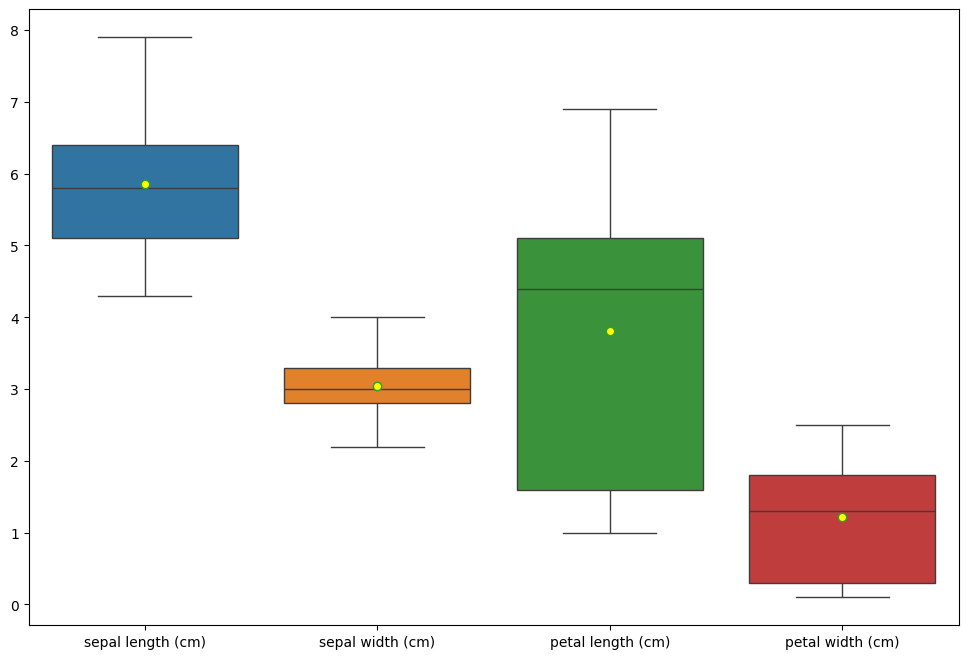

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(df.iloc[:,:-2], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow"})

In [22]:
zscore(df.iloc[:, :-2]).max()

sepal length (cm)    2.457980
sepal width (cm)     2.420223
petal length (cm)    1.765486
petal width (cm)     1.690634
dtype: float64

In [23]:
df.shape

(146, 6)

### Find duplicate values

In [24]:
duplicate = df[df.duplicated()]
duplicate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
142,5.8,2.7,5.1,1.9,2,virginica


In [25]:
df = df.drop_duplicates()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The IRIS dataset contained a duplicate row and we removed it using a pandas dataframe `drop_duplicates()` method

## <a id="6">Data analysis</a>

we will perform following studies on the given data
- find correlation between variables
- draw insights
- find patterns and trends
- classification

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   type               145 non-null    int64  
 5   species            145 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.9+ KB


In [27]:
df.iloc[:,:-1].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
sepal length (cm),1.000000,-0.123866,0.881381,0.825321,0.792591
sepal width (cm),-0.123866,1.000000,-0.403554,-0.337080,-0.401283
petal length (cm),0.881381,-0.403554,1.000000,0.961776,0.947849
petal width (cm),0.825321,-0.337080,0.961776,1.000000,0.955615
type,0.792591,-0.401283,0.947849,0.955615,1.000000


<Axes: >

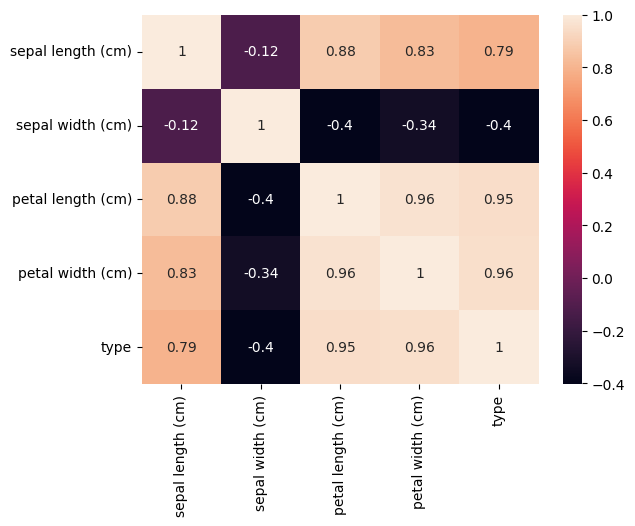

In [28]:
correlation = df.iloc[:,:-1].corr()
sns.heatmap(correlation, annot=True)

## <a id="7">data interpretation and visualisation</a>

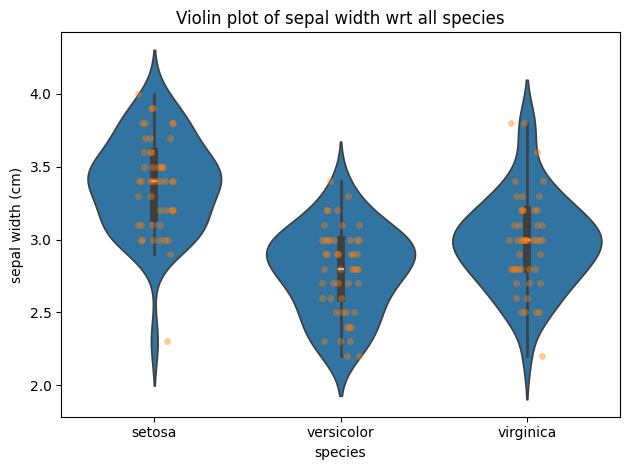

In [29]:
sns.violinplot(x='species', y="sepal width (cm)", data=df)
sns.stripplot(x='species', y="sepal width (cm)", data=df, alpha=0.4)
plt.title("Violin plot of sepal width wrt all species")
plt.tight_layout()

In [30]:
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='species', y=y2, data=df, alpha=1)
    sns.stripplot(x='species', y=y2, data=df, color='yellow', alpha=0.5, jitter=True)

    plt.title(y2 + ' distribution by species')

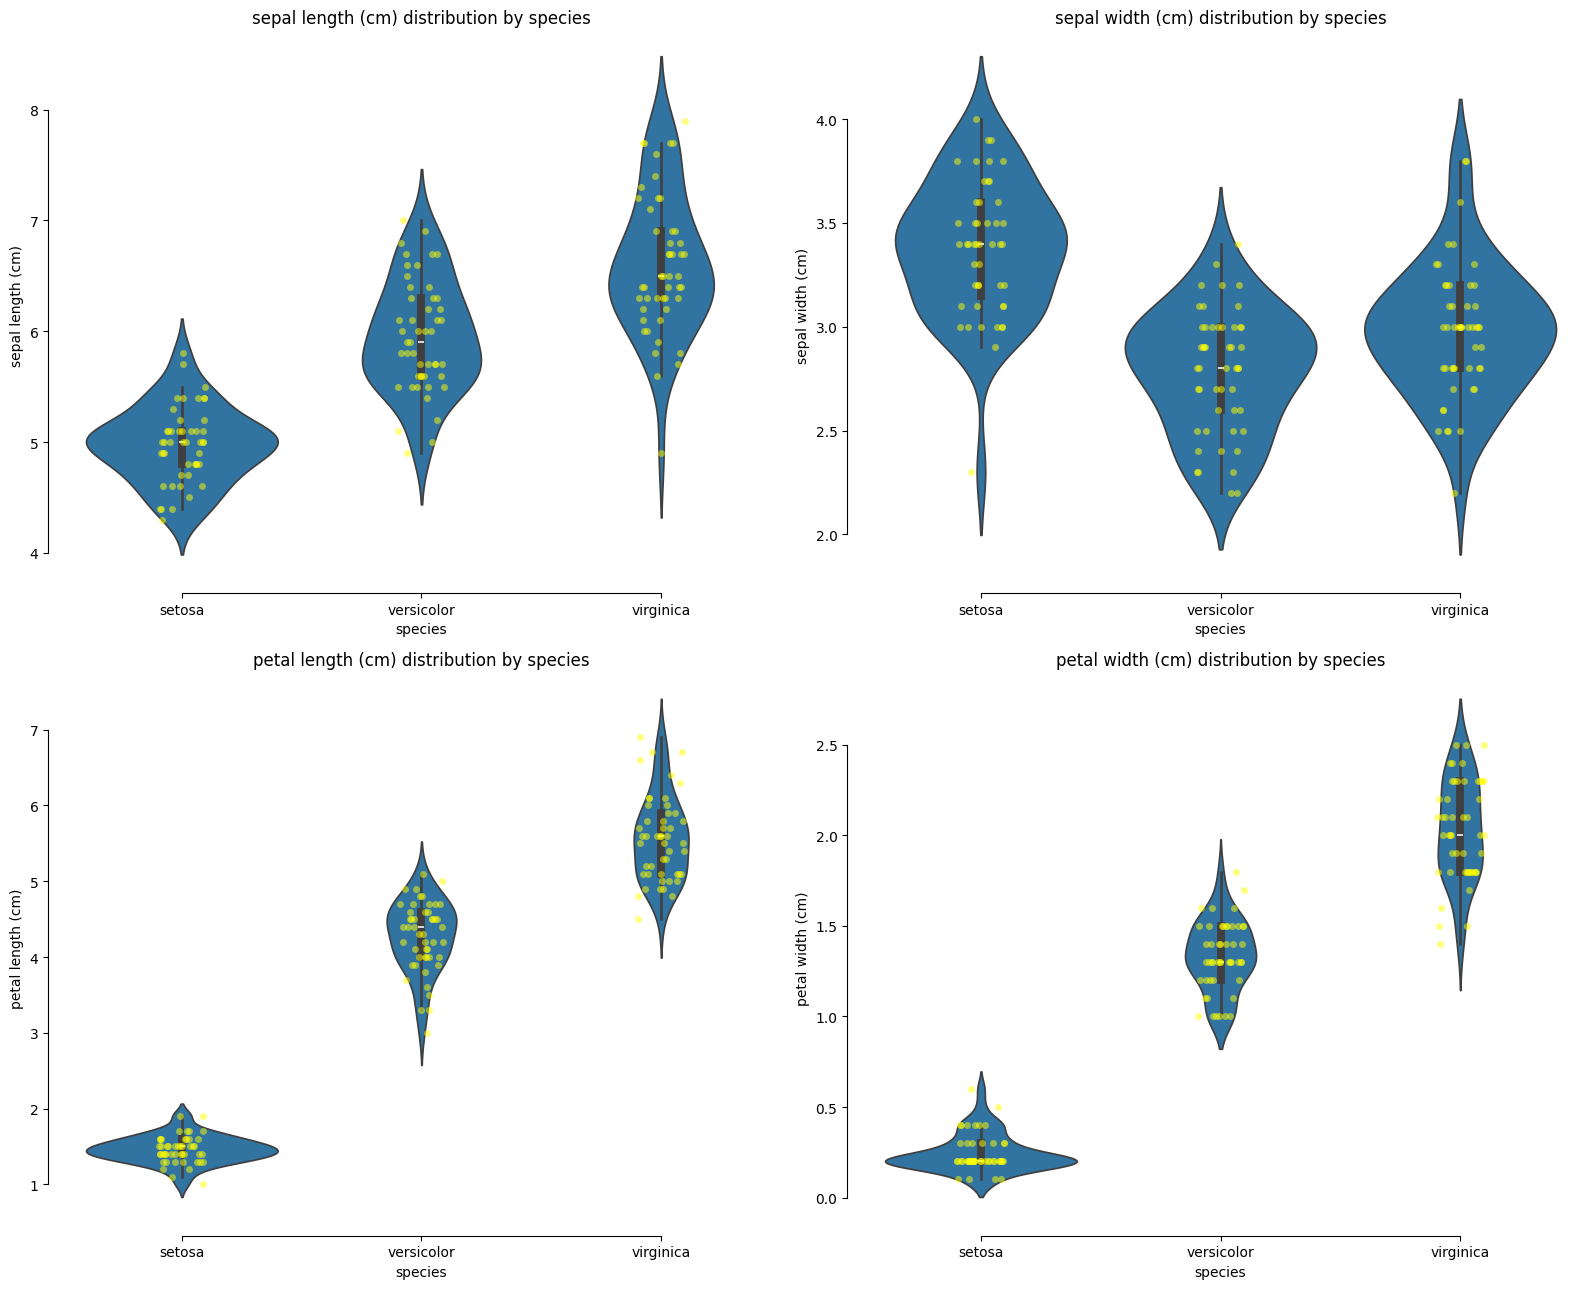

In [31]:
plt.figure(figsize=(16, 13))
i = 1
for measurement in df.columns[:-2]:
    plot_violin(measurement, i)
    sns.despine(offset=10, trim=True)
    i += 1

plt.tight_layout()
plt.show()

## Hypothesis testing

In [32]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
9,4.9,3.1,1.5,0.1,0,setosa
117,7.7,3.8,6.7,2.2,2,virginica
71,6.1,2.8,4.0,1.3,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
95,5.7,3.0,4.2,1.2,1,versicolor
125,7.2,3.2,6.0,1.8,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica
4,5.0,3.6,1.4,0.2,0,setosa
140,6.7,3.1,5.6,2.4,2,virginica


In [33]:
def iris_t_test(species1, species2, feature):
    species1_data = df[df["species"] == species1][feature]
    species2_data = df[df["species"] == species2][feature]

    if species1_data.isna().sum() > 0 or species2_data.isna().sum() > 0:
        raise ValueError("Data contains NaN values. Please clean the data before performing the T-test.")
    
    if len(species1_data) == 0 or len(species2_data) == 0:
        raise ValueError("One or both groups have no data points.")
    
    if species1_data.nunique() == 1 or species2_data.nunique() == 1:
        raise ValueError("One or both groups have identical data points, leading to zero variance.")
    t_stat, p_value = stats.ttest_ind(species1_data, species2_data, equal_var=False)

    return t_stat, p_value

In [34]:
species_list = ['setosa', 'versicolor', 'virginica']
features_list = iris.feature_names

results = []

for i in range(len(species_list)):
    for j in range(i + 1, len(species_list)):
        species1 = species_list[i]
        species2 = species_list[j]
        for feature in features_list:
            t_stat, p_value = iris_t_test(species1, species2, feature)
            null_hypothesis_rejected = p_value < 0.05
            result = {
                'species 1': species1,
                'species 2': species2,
                'feature': feature,
                'null hypothesis rejected': null_hypothesis_rejected,
                'pval': p_value,
                'tval': t_stat
            }
            results.append(result)

results_df = pd.DataFrame(results)

results_df

,species 1,species 2,feature,null hypothesis rejected,pval,tval
0,setosa,versicolor,sepal length (cm),True,2.118529e-18,-11.213368
1,setosa,versicolor,sepal width (cm),True,8.097427e-15,9.259854
2,setosa,versicolor,petal length (cm),True,4.464914e-46,-39.673747
3,setosa,versicolor,petal width (cm),True,2.849879e-47,-34.363323
4,setosa,virginica,sepal length (cm),True,1.883878e-25,-15.808610
5,setosa,virginica,sepal width (cm),True,4.082096e-08,5.977037
6,setosa,virginica,petal length (cm),True,3.516871e-49,-49.219382
7,setosa,virginica,petal width (cm),True,3.658976e-47,-42.060683
8,versicolor,virginica,sepal length (cm),True,2.032156e-07,-5.622085
9,versicolor,virginica,sepal width (cm),True,2.597560e-03,-3.093284


In [35]:
f_stat, p_value = stats.f_oneway(df[df['species'] == 'setosa']['sepal width (cm)'],
                                  df[df['species'] == 'versicolor']['sepal width (cm)'],
                                  df[df['species'] == 'virginica']['sepal width (cm)'])

print(f'ANOVA: F-statistic = {f_stat}, P-value = {p_value}')

ANOVA: F-statistic = 43.465910096956875, P-value = 1.8764413738957426e-15


## <a id="8">classification model for IRIS dataset</a>

In [36]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['type']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluating KNeighborsClassifier model

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print(f'model accuracy with k=3 is: {knn.score(X_test, y_test)}')

model accuracy with k=3 is: 0.9459459459459459


In [41]:
df.to_csv('iris.csv', index=False)

### Confusion matrix

In [42]:
cmt = confusion_matrix(y_test, y_pred)
cmt

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]])

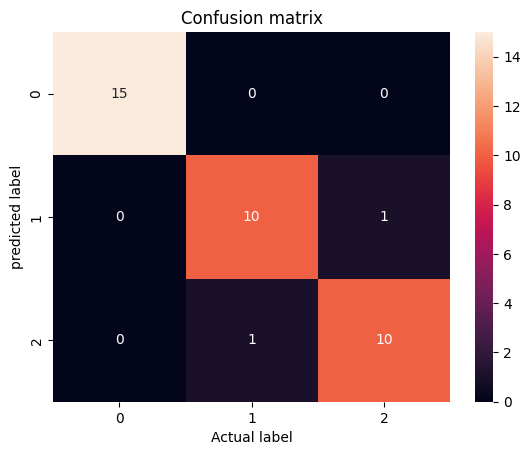

In [43]:
sns.heatmap(cmt, annot=True)
plt.ylabel("predicted label")
plt.xlabel("Actual label")
plt.title("Confusion matrix")
plt.show()

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.91      0.91      0.91        11
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37



## KNeighborsRegressor model

In [46]:
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)

KNeighborsRegressor()

### Evaluating KNeighborsRegressor model

In [47]:
y_pred = reg.predict(X_test)

In [48]:
print(f'model accuracy is: {reg.score(X_test, y_test)}')

model accuracy is: 0.9718393234672305
